In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# read the xlsx file
import pandas as pd

df = pd.read_excel ('/content/drive/MyDrive/USA GDP Growth 1961-2022.xlsx')

# remove the dollar sign and B from GDP column
df['GDP'] = df['GDP'].str.replace('$', '')
df['GDP'] = df['GDP'].str.replace('B', '')

# remove , and . from GDP column
df['GDP'] = df['GDP'].str.replace(',', '')
df['GDP'] = df['GDP'].str.replace('.', '')

# convert GDP column to float
df['GDP'] = df['GDP'].astype(int)

# drop the Growth column
df = df.drop('Growth', axis=1)

# drop the year column
df = df.drop('Year', axis=1)

# save the cleaned data to a new csv file
df.to_csv('/USA_GDP_Growth.csv', index=False)

<ipython-input-3-0dc593f443ec>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace('$', '')
<ipython-input-3-0dc593f443ec>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace('.', '')


In [ ]:
STEP_SIZES = [5, 10, 15, 20, 25, 30]
TARGETS = ['GDP', 'PER_CAPITA']

In [ ]:
# import cleaned data
df = pd.read_csv('/USA_GDP_Growth.csv')

# convert the data to numpy array
data = df.to_numpy()

# reverse the data
data = data[::-1]

for target in TARGETS:
    for step_size in STEP_SIZES:

        # create a new dataframe with step_size the amount of columns for GDP and PER_CAPITA
        gdp_column_names = [f'GDP_{i}' for i in range(step_size)]
        capita_column_names = [f'PER_CAPITA_{i}' for i in range(step_size)]

        # create a new dataframe with step_size the amount of columns for GDP and PER_CAPITA
        df = pd.DataFrame(columns=gdp_column_names + capita_column_names + ['target'])

        # enumerate the data
        for i, d in enumerate(data):

            if i >= step_size:

                # create the input and output
                x = data[i-step_size:i]
                y = data[i][TARGETS.index(target)]

                # iterate over the input
                gdp_features = []
                capita_features = []
                for j, x_i in enumerate(x):

                    # append the GDP and PER_CAPITA features
                    gdp_features.append(x_i[0])
                    capita_features.append(x_i[1])

                # append the features and target to the dataframe
                df = df.append(pd.Series(gdp_features + capita_features + [y], index=df.columns), ignore_index=True)

        # save the data to a csv file
        df.to_csv(f'/USA_GDP_Growth-{target.lower()}-{step_size}.csv', index=False)

<ipython-input-6-d977b507ffb2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(gdp_features + capita_features + [y], index=df.columns), ignore_index=True)
<ipython-input-6-d977b507ffb2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(gdp_features + capita_features + [y], index=df.columns), ignore_index=True)
<ipython-input-6-d977b507ffb2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(gdp_features + capita_features + [y], index=df.columns), ignore_index=True)
<ipython-input-6-d977b507ffb2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import math
import pickle

import warnings
warnings.simplefilter("ignore")

In [ ]:
# load the gdp model
with open('/USA_GDP_Growth-GDP-30.pickle', 'rb') as f:
    gdp_model = pickle.load(f)
f.close()

# load the per capita model
with open('/USA_GDP_Growth-PER_CAPITA-30.pickle', 'rb') as f:
    capita_model = pickle.load(f)
f.close()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Prediction
# The basic idea is to feed the model its own prediction to go step by step into the future for as many steps as the stepsize indicates. After getting the predictions for the GDP and the GDP per Capita those get appended to the array and the first element (the one most into the past) gets removed. When the max iteration is reached the prediction gets appended to the already existing values therefore creating the plots seen below.

In [ ]:
import numpy as np


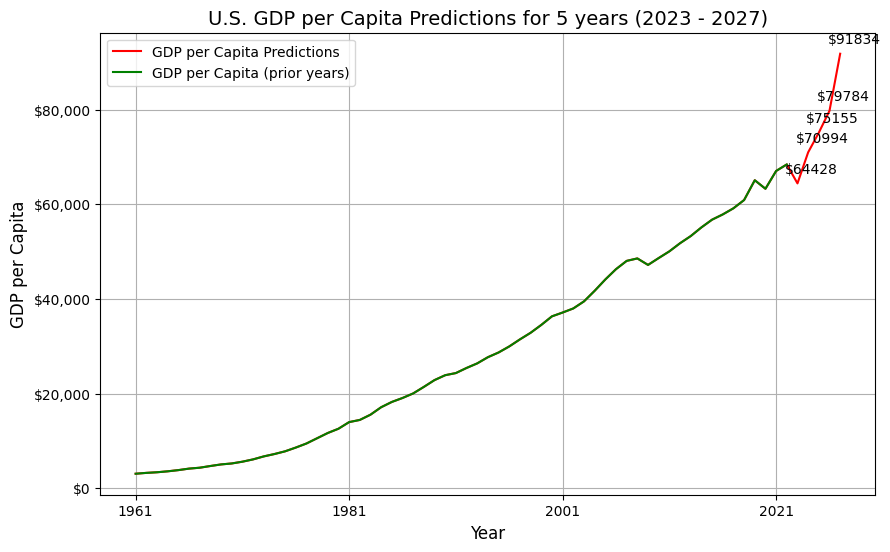

<Figure size 640x480 with 0 Axes>

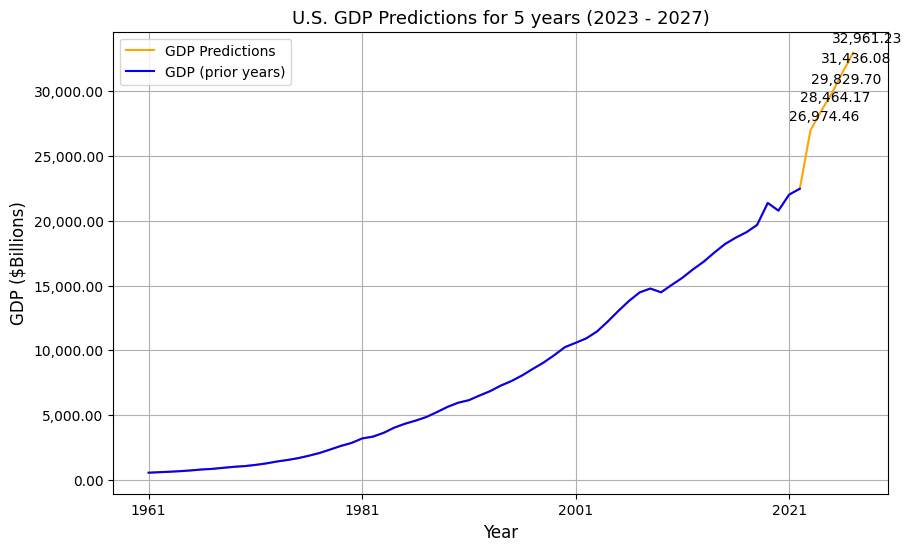

<Figure size 640x480 with 0 Axes>

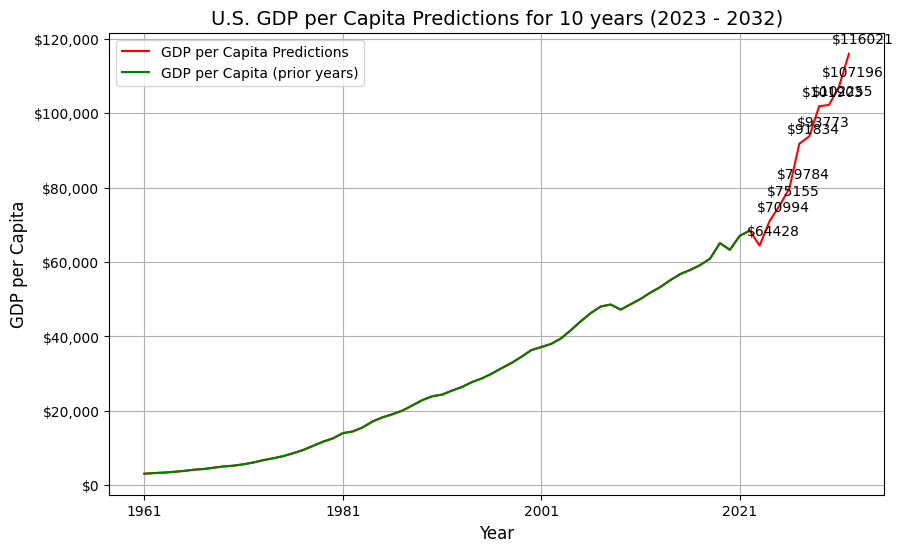

<Figure size 640x480 with 0 Axes>

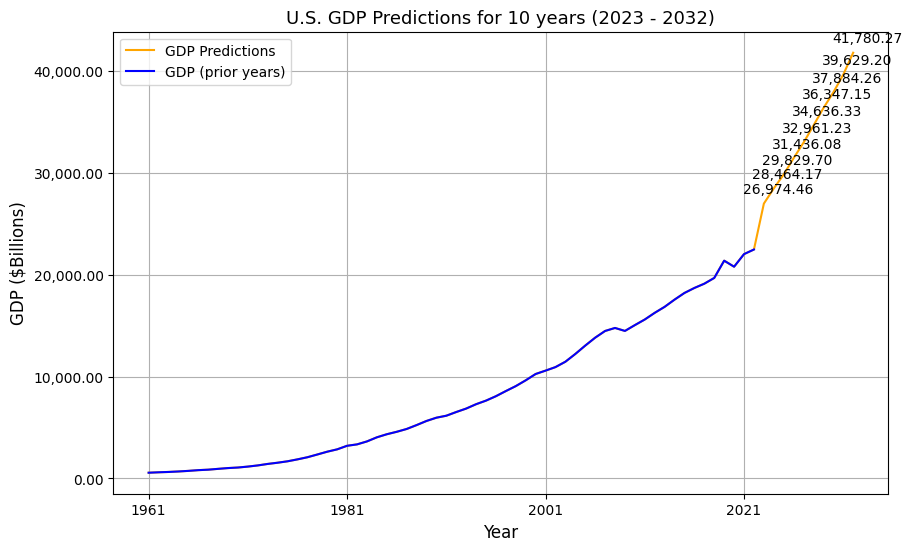

<Figure size 640x480 with 0 Axes>

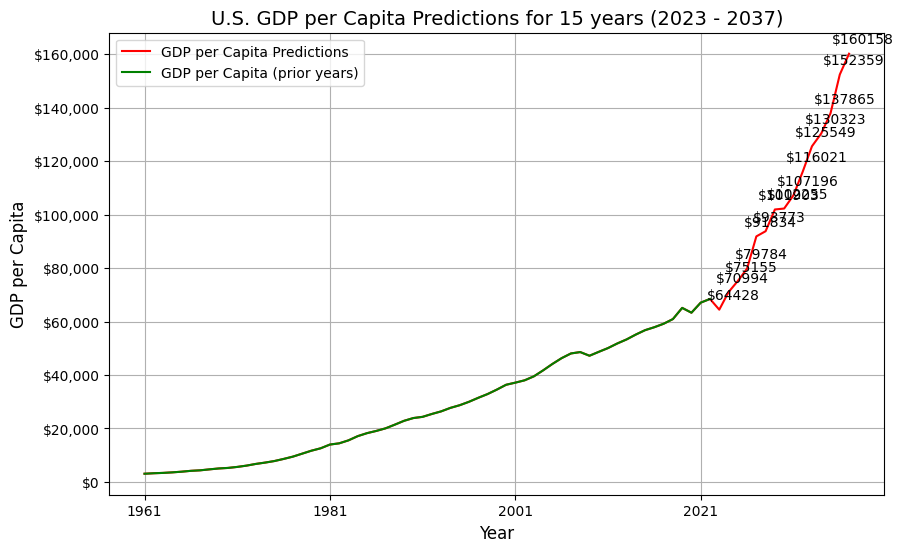

<Figure size 640x480 with 0 Axes>

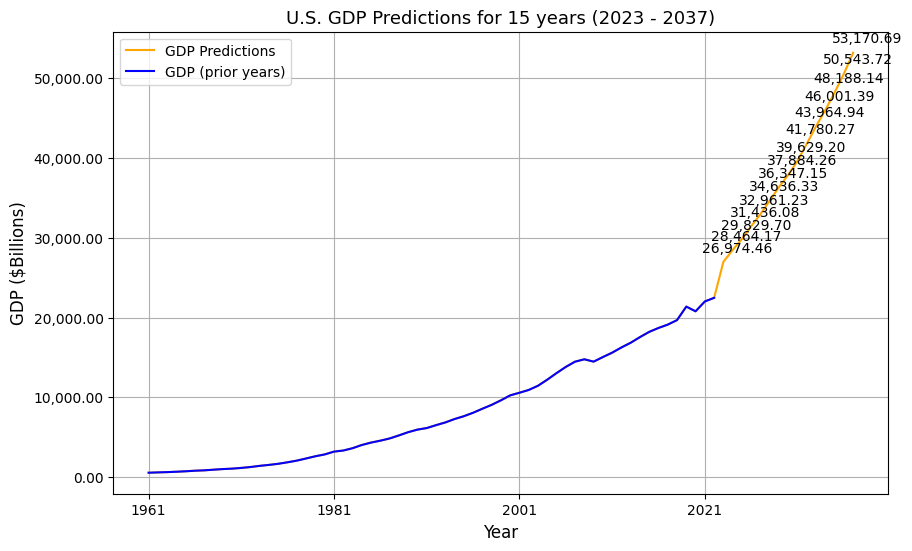

<Figure size 640x480 with 0 Axes>

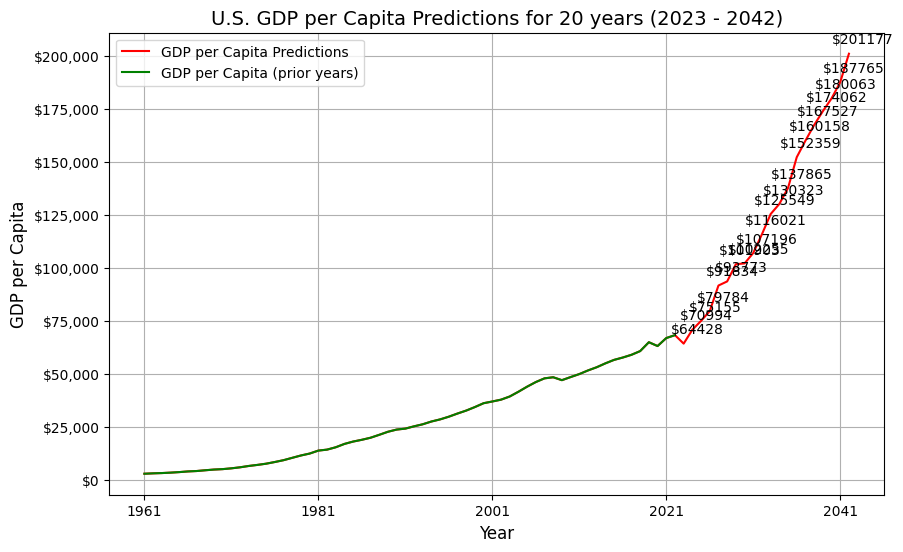

<Figure size 640x480 with 0 Axes>

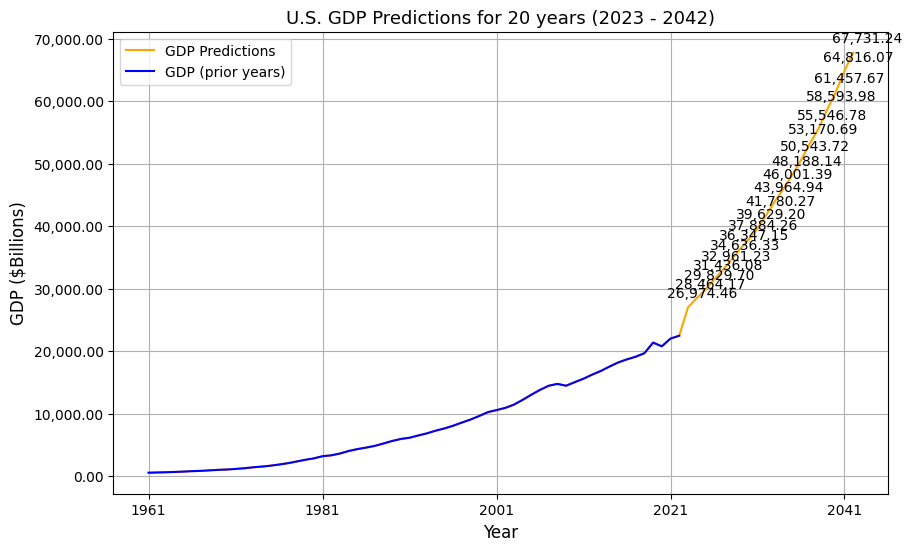

<Figure size 640x480 with 0 Axes>

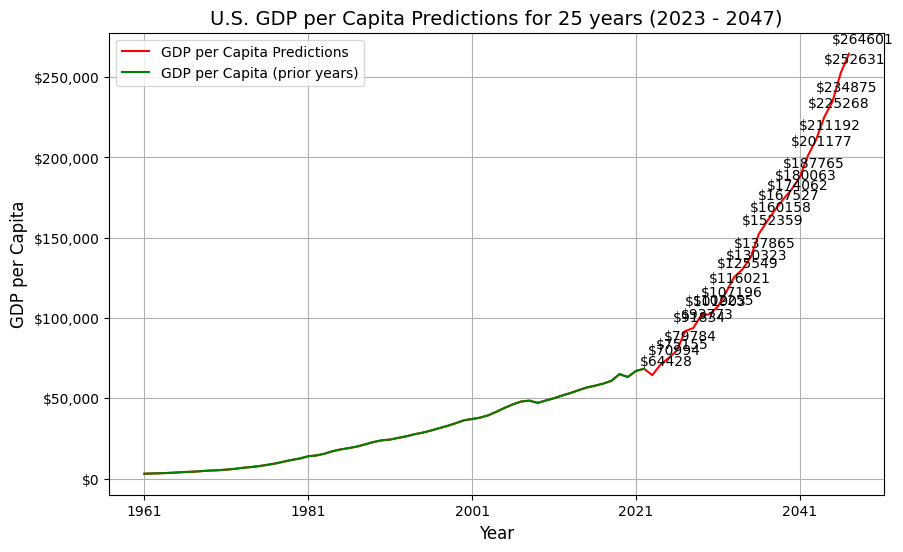

<Figure size 640x480 with 0 Axes>

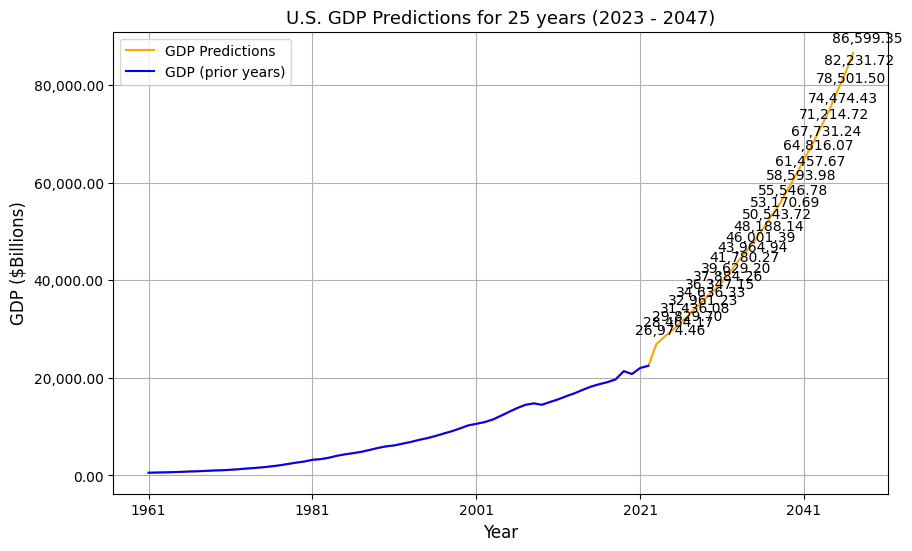

<Figure size 640x480 with 0 Axes>

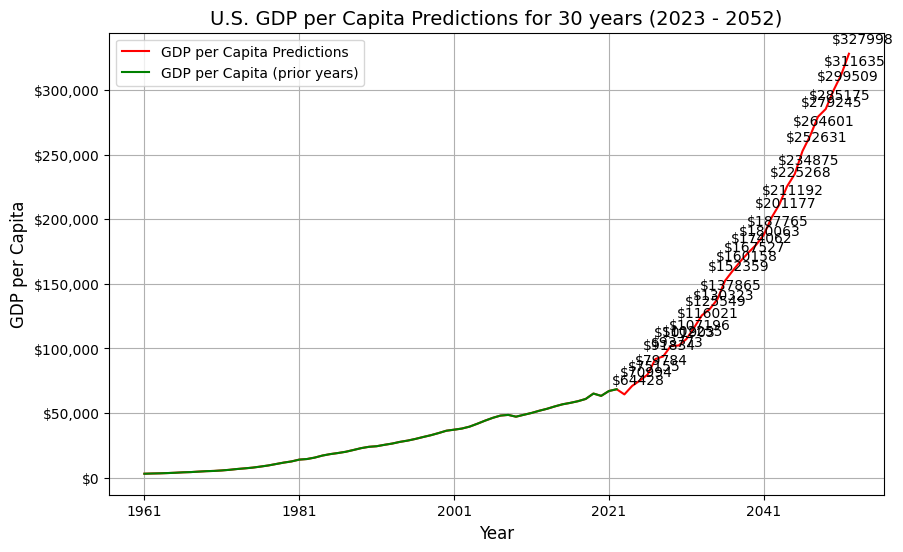

<Figure size 640x480 with 0 Axes>

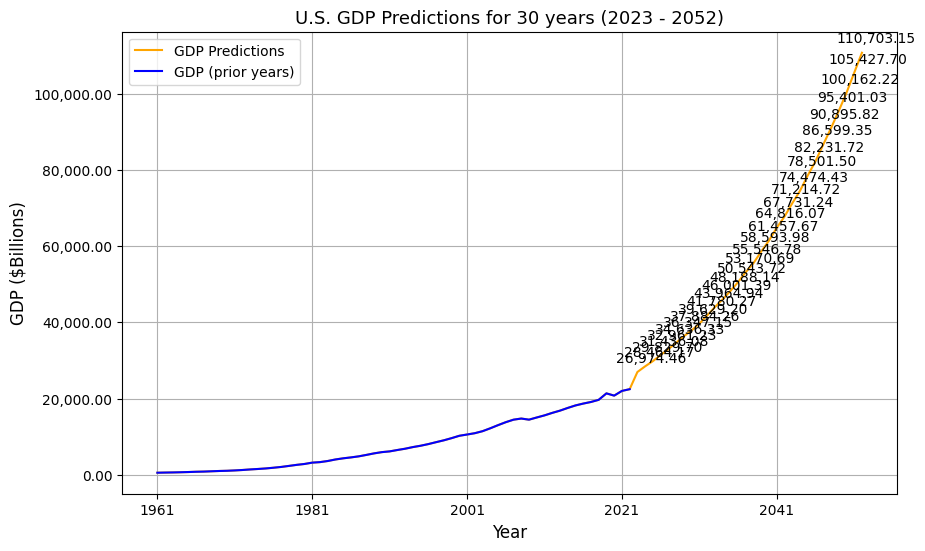

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter, FixedLocator, FixedFormatter
from matplotlib.ticker import StrMethodFormatter, FixedLocator, FixedFormatter

# Calculate the number of years based on the step size
num_years = 1961 + step_size * 20

for step_size in STEP_SIZES:
    # import the data
    df = pd.read_csv('/USA_GDP_Growth.csv')

    # make a copy of the data
    df_copy = df.copy()

    # get the first 20 rows
    df = df.head(30)

    # convert the data to numpy array
    gdp = df['GDP'].to_numpy()
    per_capita = df['GDP per Capita'].to_numpy()

    # reverse the data
    gdp = gdp[::-1]
    per_capita = per_capita[::-1]

    gdp_predictions = []
    capita_predictions = []
    for i in range(step_size):
        # add the per_capita array to the gdp array
        data = np.concatenate((gdp, per_capita), axis=0)

        # predict the data
        gdp_pred = gdp_model.predict([data])
        capita_pred = capita_model.predict([data])

        # round the predictions
        gdp_pred = round(gdp_pred[0])
        capita_pred = round(capita_pred[0])

        # remove the first element from the arrays
        gdp = np.delete(gdp, 0)
        per_capita = np.delete(per_capita, 0)

        # append the predictions to the arrays
        gdp = np.append(gdp, gdp_pred)
        per_capita = np.append(per_capita, capita_pred)

        # append the predictions to the predictions arrays
        gdp_predictions.append(gdp_pred)
        capita_predictions.append(capita_pred)

    # get the columns as numpy arrays
    gdp_original = df_copy['GDP'].to_numpy()
    gdp_per_capita_original = df_copy['GDP per Capita'].to_numpy()

    # reverse the data
    gdp_original = gdp_original[::-1]
    gdp_per_capita_original = gdp_per_capita_original[::-1]

    # append the predictions to the copies
    gdp_predictions = np.concatenate((gdp_original, gdp_predictions), axis=0)
    gdp_per_capita_predictions = np.concatenate((gdp_per_capita_original, capita_predictions), axis=0)

    # Set figure size
    plt.figure(figsize=(10, 6))

    # plot the per capita predictions
    plt.plot(gdp_per_capita_predictions, linestyle='-', color='red', label='GDP per Capita Predictions')
    plt.plot(gdp_per_capita_original, linestyle='-', color='green', label='GDP per Capita (prior years)')
    plt.legend(loc='upper left')
    plt.title(f'U.S. GDP per Capita Predictions for {step_size} years (2023 - {step_size + 2022})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('GDP per Capita', fontsize=12)
    plt.grid(True)

    # Add annotations for predicted GDP per capita numbers
    for i, gdp_per_capita_val in enumerate(capita_predictions):
        plt.annotate(f'${gdp_per_capita_val:.0f}', (i + len(gdp_per_capita_original), gdp_per_capita_val),
                     textcoords="offset points", xytext=(10, 10), va='center', ha='center')

    # Format y-axis labels
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

    # Set x-axis tick positions and labels
    tick_positions = range(0, len(gdp_per_capita_predictions), 20)
    years = [str(1961 + i * 20) for i in range(len(tick_positions))]
    plt.gca().xaxis.set_major_locator(FixedLocator(tick_positions))
    plt.gca().xaxis.set_major_formatter(FixedFormatter(years))

    # save the plot
    # plt.savefig(f'images/per_capita-{step_size}.png')
    plt.show()

    # clear the plot
    plt.clf()

    #Set figure size for GDP predictions
    plt.figure(figsize=(10, 6))

    # Scale down the GDP values and predicti0ons to billions
    gdp_billions = gdp_predictions / 100
    gdp_original_billions = gdp_original / 100

    # Plot the GDP predictions in billions
    plt.plot(gdp_billions, linestyle='-', color='orange', label='GDP Predictions')
    plt.plot(gdp_original_billions, linestyle='-', color='blue', label='GDP (prior years)')
    plt.legend(loc='upper left')
    plt.title(f'U.S. GDP Predictions for {step_size} years (2023 - {step_size + 2022})', fontsize=13)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('GDP ($Billions)', fontsize=12)
    plt.grid(True)

    # Add annotations for predicted GDP numbers in billions with commas
    for i, gdp_val in enumerate(gdp_billions):
        if i >= len(gdp_original_billions):
            plt.annotate(f'{gdp_val:,.2f}', (i, gdp_val),
                        textcoords="offset points", xytext=(10, 10), va='center', ha='center')

    # Format y-axis labels in billions (B) with commas
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

    # Set x-axis tick positions and labels
    tick_positions = range(0, len(gdp_predictions), 20)
    years = [str(1961 + i * 20) for i in range(len(tick_positions))]
    plt.gca().xaxis.set_major_locator(FixedLocator(tick_positions))
    plt.gca().xaxis.set_major_formatter(FixedFormatter(years))

    # Show the plot for GDP predictions
    plt.show()

    # Clear the plot
    plt.clf()
